<a href="https://colab.research.google.com/github/glazar01/lyric-pulse-sentiment-analysis/blob/main/lyric_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --no-cache-dir transformers sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 260.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 263.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 198.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 161.4 MB/s eta 0:00:00


In [14]:
# import libraries
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import spacy

# Data

## Single Label Data

In [3]:
url = "https://raw.githubusercontent.com/glazar01/lyric-pulse-sentiment-analysis/main/data/SingleLabel.csv"
s_data = pd.read_csv(url)

In [4]:
s_data.head()

,artist,genre,title,album,year,lyrics,label
0,Nirvana,Rock,You Know You’re Right,Nirvana,2002.0,I will never bother you\nI will never promise ...,Sadness
1,Damian Marley,Reggae,Here We Go,Stony Hill,2017.0,Here we go\nMy big ego is gonna get me in trou...,Tension
2,The Mission UK,Rock,Jade,Another Fall from Grace,2016.0,She came as Lolita dressed as Venus\nAnd adorn...,Tenderness
3,UB40,Reggae,Food For Thought,Signing Off,1980.0,"Ivory Madonna, dying in the dust\nWaiting for ...",Sadness
4,Johnny Cash,Country,I’ve Been Everywhere,American II: Unchained,1996.0,I was totin' my pack along the dusty Winnemucc...,Sadness


In [5]:
labels = s_data['label']
unique_labels = labels.unique()
unique_labels

array(['Sadness', 'Tension', 'Tenderness'], dtype=object)

In [6]:
s_lyrics = s_data['lyrics']
print(s_lyrics.head())
s_lyrics.shape

0    I will never bother you\nI will never promise ...
1    Here we go\nMy big ego is gonna get me in trou...
2    She came as Lolita dressed as Venus\nAnd adorn...
3    Ivory Madonna, dying in the dust\nWaiting for ...
4    I was totin' my pack along the dusty Winnemucc...
Name: lyrics, dtype: object


(1160,)

In [7]:
type(s_lyrics)

pandas.core.series.Series

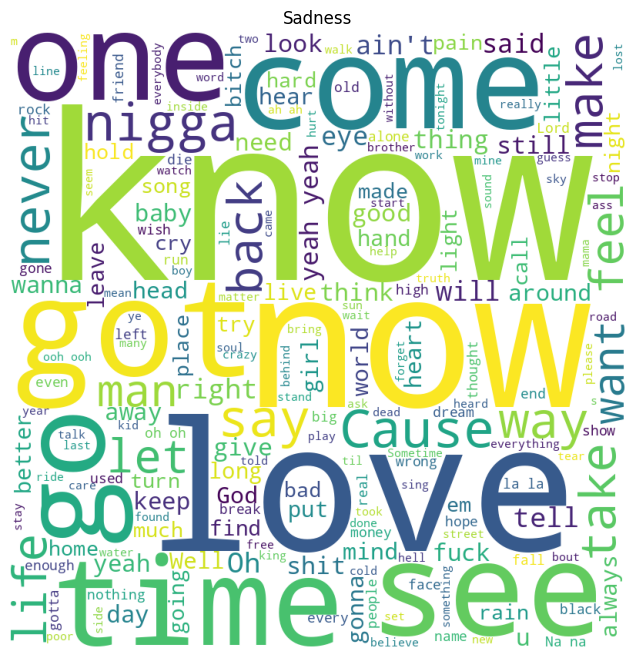

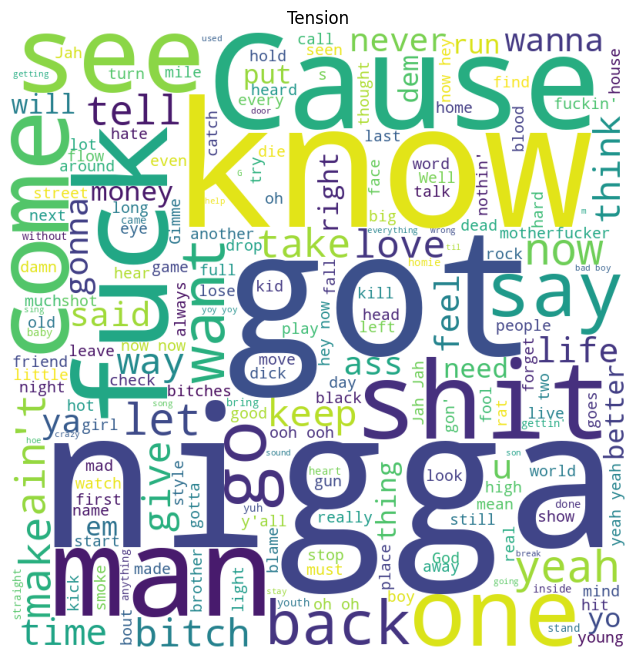

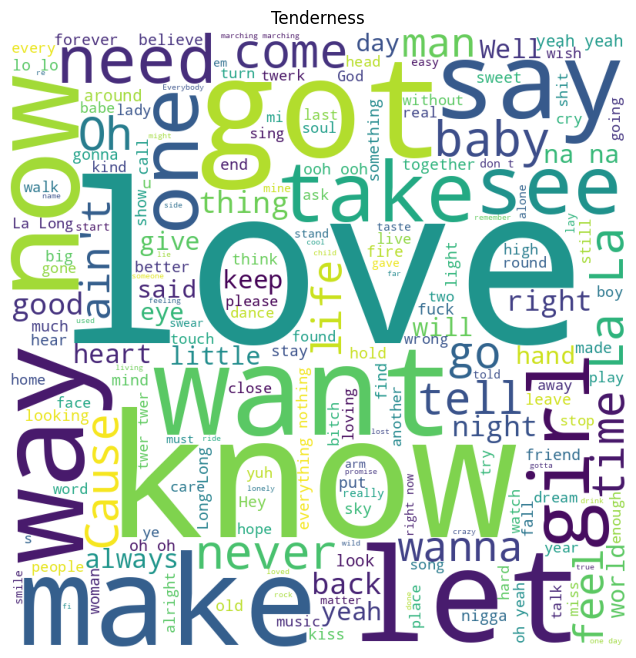

In [8]:
word_dict = dict()
for val in unique_labels:
    sentences = ""
    for l in s_data.loc[s_data['label'] == val]['lyrics']:
        sentences += " " + l
    word_dict[val] =sentences
for key in word_dict:
    word_cloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = STOPWORDS,
                    min_font_size = 5).generate(word_dict[key])
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.axis("off")
    plt.title(str(key))
    plt.imshow(word_cloud)
    plt.savefig(str(key) + ".png")

In [ ]:
# Split the text into sentences using spaCy
nlp = spacy.load("en_core_web_sm")

for i in range(len(lyrics))
doc = nlp(text)
text_segments = [sent.text for sent in doc.sents]

In [15]:
nlp = spacy.load("en_core_web_sm")
s_lyrics_dict = {}
for i in range(len(s_lyrics)):
  doc = nlp(s_lyrics[i])
  text_segments = [sent.text for sent in doc.sents]
  s_lyrics_dict[i] = text_segments

In [18]:
s_lyrics_dict[0]

["I will never bother you\nI will never promise to\nI will never follow you\nI will never bother you\nNever speak a word again\nI will crawl away for good\nI will move away from here\nYou won't be afraid of fear\n",
 "No thought was put into this\nAnd always knew it would come to this\nThings have never been so swell\nI have never failed to fail\n\nHe-eee-eee-eeey\nHe-eee-eee-eey\nHe-eee-eee-ey\nYou know you're right\n",
 "You know you're right\n",
 "You know you're right\n\nI'm so warm and calm inside\nI no longer have to hide\nLet's talk about someone else\nSteaming soup against her mouth\nNothing really bothers her\nShe just wants to love himself\nI will move away from here\n",
 "You won't be afraid of fear\n",
 "No thought was put into this\nAlways knew it'd come to this\nThings have never been so swell\nI have never failed to fail\n\nHe-eee-eee-eey\nHe-eee-eee-eey\nHe-eee-eee-eey\nHe-eee-eee-eey\nHe-eee-eee-eey\nYou know you're right\n",
 "You know you're right\n",
 "You know you'

## Multi Label Data

In [ ]:
url = "https://raw.githubusercontent.com/glazar01/lyric-pulse-sentiment-analysis/main/data/MultiLabel.csv"
m_data = pd.read_csv(url)

In [ ]:
m_data.head()

,artist,genre,title,album,year,lyrics,labels
0,Nirvana,Rock,You Know You’re Right,Nirvana,2002.0,I will never bother you\nI will never promise ...,"Calmness, Sadness"
1,Damian Marley,Reggae,Here We Go,Stony Hill,2017.0,Here we go\nMy big ego is gonna get me in trou...,"Power, Tension"
2,The Mission UK,Rock,Jade,Another Fall from Grace,2016.0,She came as Lolita dressed as Venus\nAnd adorn...,"Amazement, Calmness, Solemnity, Tenderness"
3,UB40,Reggae,Food For Thought,Signing Off,1980.0,"Ivory Madonna, dying in the dust\nWaiting for ...","Joyful activation, Sadness, Tension"
4,Johnny Cash,Country,I’ve Been Everywhere,American II: Unchained,1996.0,I was totin' my pack along the dusty Winnemucc...,"Amazement, Calmness, Joyful activation"


In [ ]:
y = m_data['labels']

In [ ]:
vectorizer = CountVectorizer()
emotion_dtm = vectorizer.fit_transform(y)
emotions = vectorizer.get_feature_names_out()
emotions

array(['activation', 'amazement', 'calmness', 'joyful', 'nostalgia',
       'power', 'sadness', 'solemnity', 'tenderness', 'tension'],
      dtype=object)

In [ ]:
freqs = emotion_dtm.sum(axis=0).A1
result = dict(zip(emotions, freqs))
freq_count = pd.DataFrame(result.items(), columns=['Emotions', 'Counts'])
freq_sorted = freq_count.sort_values(['Counts'], ascending=False)
freq_sorted

,Emotions,Counts
6,sadness,574
9,tension,553
8,tenderness,498
5,power,477
4,nostalgia,438
7,solemnity,377
0,activation,349
3,joyful,349
2,calmness,250
1,amazement,239


In [ ]:
emotion_per_example = emotion_dtm.sum(axis=1).tolist()
emotion_per_example = [int(j) for i in emotion_per_example for j in i]
print('Maximum emotions per example: %d'%max(emotion_per_example))
print('Minimum emotions per example: %d'%min(emotion_per_example))
print('Average emotions per example: %f'% ((sum(emotion_per_example))/len(emotion_per_example)))

Maximum emotions per example: 8
Minimum emotions per example: 1
Average emotions per example: 3.537931


# MODELS

# 1. EmoRoBERTa

**Labels:** admiration, amusement, anger, annoyance, approval, caring, confusion, curiosity, desire, disappointment, disapproval, disgust, embarrassment, excitement, fear, gratitude, grief, joy, love, nervousness, optimism, pride, realization, relief, remorse, sadness, surprise + neutral

We have the label **sadness** in both model and test data set. We do not have tension and tenderness, but we can see what other synonyms we have.

**Tension**: nervousness, confusion, embarrassment

**Tenderness**: love, caring

### Example

In [9]:
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa", use_fast=False)
model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion = pipeline('sentiment-analysis',
                    model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [10]:
emotion_labels = emotion("Thanks for using it.")
print(emotion_labels)

[{'label': 'gratitude', 'score': 0.9964383840560913}]


In [79]:
text=s_lyrics[1]

In [82]:
max_seq_length = model.config.max_position_embeddings
max_seq_length

514

In [85]:
# Split the text into sentences using spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
text_segments = [sent.text for sent in doc.sents]

In [86]:
text_segments

['Here we go\nMy big ego is gonna get me in trouble\nTrying to play hero\n',
 "My jeans can't tight like Michael Phelps speedo\nWe no play follow fashion, when we lead out\nNow looky here, my big ideas\nGonna get me in trouble now amongst my peers\nBut have no fear, no bother cry tears\n",
 "You're just miles ahead when I'm ahead light years\n\n(Here.. here I come again)\n",
 'Gong originally, run fi the grand finale\n(Have no fear..',
 'for it is only I)\n',
 "I do it regularly, through every hill and valley\n(I'm here to teach you only truth)\n",
 "It's Mister Warm and Easy\nSomebody please believe me\n(For the things you do, Jah is watching you)\n\n",
 "Man a wah do some likkle bomboclaated\nWeh feel like them big 'cause dem album charted\n",
 "Well all bad card will be disregarded\nNo punk cyaan finish weh what Bob Marley started\nGong to the Zilla, I'm the Don Die-Hearted\n",
 'Anywhere me go, dem roll out red carpet\nSome man a buy car and nah no house fi park it\n',
 "Nah unify 

In [87]:
text

"Here we go\nMy big ego is gonna get me in trouble\nTrying to play hero\nMy jeans can't tight like Michael Phelps speedo\nWe no play follow fashion, when we lead out\nNow looky here, my big ideas\nGonna get me in trouble now amongst my peers\nBut have no fear, no bother cry tears\nYou're just miles ahead when I'm ahead light years\n\n(Here.. here I come again)\nGong originally, run fi the grand finale\n(Have no fear.. for it is only I)\nI do it regularly, through every hill and valley\n(I'm here to teach you only truth)\nIt's Mister Warm and Easy\nSomebody please believe me\n(For the things you do, Jah is watching you)\n\nMan a wah do some likkle bomboclaated\nWeh feel like them big 'cause dem album charted\nWell all bad card will be disregarded\nNo punk cyaan finish weh what Bob Marley started\nGong to the Zilla, I'm the Don Die-Hearted\nAnywhere me go, dem roll out red carpet\nSome man a buy car and nah no house fi park it\nNah unify dem selfish like market\nDem sell out dem souls ju

### Testing the model

In [77]:
emotion_labels_1 = []

#length = s_lyrics.shape[0]
length = 10

for i in range(1):
  try:
    emotion_labels_1.append(emotion(s_lyrics[1]))
  except Exception as e:
    print("i =", i,": An exception occurred")
    print(e)
print(len(emotion_labels_1))

Token indices sequence length is longer than the specified maximum sequence length for this model (969 > 512). Running this sequence through the model will result in indexing errors


i = 0 : An exception occurred
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,854] = 856 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 969), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 969), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False
0


# 2. roberta-base-go_emotions

### Example

In [14]:
from transformers import pipeline

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

In [2]:
sentences = ["I am not having a great day"]

model_outputs = classifier(sentences)
print(model_outputs[0])
# produces a list of dicts for each of the labels

[{'label': 'disappointment', 'score': 0.46669524908065796}, {'label': 'sadness', 'score': 0.398495078086853}, {'label': 'annoyance', 'score': 0.06806596368551254}, {'label': 'neutral', 'score': 0.05703027546405792}, {'label': 'disapproval', 'score': 0.04423932731151581}, {'label': 'nervousness', 'score': 0.014850745908915997}, {'label': 'realization', 'score': 0.014059904962778091}, {'label': 'approval', 'score': 0.011267471127212048}, {'label': 'joy', 'score': 0.006303394213318825}, {'label': 'remorse', 'score': 0.006221492309123278}, {'label': 'caring', 'score': 0.006029406096786261}, {'label': 'embarrassment', 'score': 0.0052654859609901905}, {'label': 'anger', 'score': 0.0049814279191195965}, {'label': 'disgust', 'score': 0.004259033594280481}, {'label': 'grief', 'score': 0.0040021371096372604}, {'label': 'confusion', 'score': 0.003382918192073703}, {'label': 'relief', 'score': 0.0031405005138367414}, {'label': 'desire', 'score': 0.00282747158780694}, {'label': 'admiration', 'score

### Testing model

In [22]:
emotion_labels_2 = []

#length = s_lyrics.shape[0]
length = 5

for i in range(length):
  try:
    emotion_labels_2.append(classifier(s_lyrics[i]))
  except Exception as e:
    print("i =", i,": An exception occurred")
    print(e)

i = 1 : An exception occurred
The expanded size of the tensor (969) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 969].  Tensor sizes: [1, 514]
i = 4 : An exception occurred
The expanded size of the tensor (684) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 684].  Tensor sizes: [1, 514]


In [24]:
print(len(emotion_labels_2))
print(emotion_labels_2)
print(emotion_labels_2[0])

3
[[[{'label': 'approval', 'score': 0.5469817519187927}, {'label': 'neutral', 'score': 0.3794184625148773}, {'label': 'realization', 'score': 0.041055724024772644}, {'label': 'annoyance', 'score': 0.038775648921728134}, {'label': 'anger', 'score': 0.011280348524451256}, {'label': 'disapproval', 'score': 0.009933975525200367}, {'label': 'admiration', 'score': 0.009317510761320591}, {'label': 'caring', 'score': 0.008861214853823185}, {'label': 'optimism', 'score': 0.008721102960407734}, {'label': 'love', 'score': 0.008435306139290333}, {'label': 'fear', 'score': 0.007663618307560682}, {'label': 'excitement', 'score': 0.007383408024907112}, {'label': 'joy', 'score': 0.0065092723816633224}, {'label': 'disappointment', 'score': 0.00560944015160203}, {'label': 'sadness', 'score': 0.003584089921787381}, {'label': 'relief', 'score': 0.0033677390310913324}, {'label': 'surprise', 'score': 0.0031086772214621305}, {'label': 'pride', 'score': 0.002746876096352935}, {'label': 'disgust', 'score': 0.0

# 3. emotion-english-distilroberta-base

### Example

In [26]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

In [27]:
classifier("I love this!")

[[{'label': 'anger', 'score': 0.004419787786900997},
  {'label': 'disgust', 'score': 0.001611991785466671},
  {'label': 'fear', 'score': 0.0004138524236623198},
  {'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'neutral', 'score': 0.005764591973274946},
  {'label': 'sadness', 'score': 0.002092393347993493},
  {'label': 'surprise', 'score': 0.008528684265911579}]]

### Testing model

In [37]:
emotion_labels_3 = []

#length = s_lyrics.shape[0]
length = 5

for i in range(length):
  try:
    emotion_labels_3.append(classifier(s_lyrics[i]))
  except Exception as e:
    print("i =", i,": An exception occurred")
    print(e)

i = 1 : An exception occurred
The size of tensor a (894) must match the size of tensor b (512) at non-singleton dimension 1
i = 4 : An exception occurred
The size of tensor a (625) must match the size of tensor b (512) at non-singleton dimension 1


In [62]:
len(s_lyrics[0])

1304

In [63]:
len(s_lyrics[1])

3570

In [38]:
print(len(emotion_labels_3))
print(emotion_labels_3)
emotion_labels_3[0]

3
[[[{'label': 'sadness', 'score': 0.2264464944601059}, {'label': 'joy', 'score': 0.15882547199726105}, {'label': 'love', 'score': 0.0046456437557935715}, {'label': 'anger', 'score': 0.436862975358963}, {'label': 'fear', 'score': 0.17143386602401733}, {'label': 'surprise', 'score': 0.001785537227988243}]], [[{'label': 'sadness', 'score': 0.035244014114141464}, {'label': 'joy', 'score': 0.8715860843658447}, {'label': 'love', 'score': 0.00818107184022665}, {'label': 'anger', 'score': 0.07791206985712051}, {'label': 'fear', 'score': 0.005313320551067591}, {'label': 'surprise', 'score': 0.0017635425319895148}]], [[{'label': 'sadness', 'score': 0.8164834380149841}, {'label': 'joy', 'score': 0.00783432088792324}, {'label': 'love', 'score': 0.0022423206828534603}, {'label': 'anger', 'score': 0.10185965895652771}, {'label': 'fear', 'score': 0.06946748495101929}, {'label': 'surprise', 'score': 0.002112833084538579}]]]


[[{'label': 'sadness', 'score': 0.2264464944601059},
  {'label': 'joy', 'score': 0.15882547199726105},
  {'label': 'love', 'score': 0.0046456437557935715},
  {'label': 'anger', 'score': 0.436862975358963},
  {'label': 'fear', 'score': 0.17143386602401733},
  {'label': 'surprise', 'score': 0.001785537227988243}]]

# 4. distilbert-base-uncased-emotion

### Example

In [30]:
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [33]:
prediction = classifier("I love using transformers. The best part is wide range of support and its easy to use", )
prediction

[[{'label': 'sadness', 'score': 0.0006792707135900855},
  {'label': 'joy', 'score': 0.9959298968315125},
  {'label': 'love', 'score': 0.0009452453814446926},
  {'label': 'anger', 'score': 0.0018055220134556293},
  {'label': 'fear', 'score': 0.0004111042362637818},
  {'label': 'surprise', 'score': 0.00022885717044118792}]]

### Testing model

In [35]:
emotion_labels_4 = []

#length = s_lyrics.shape[0]
length = 5

for i in range(length):
  try:
    emotion_labels_4.append(classifier(s_lyrics[i]))
  except Exception as e:
    print("i =", i,": An exception occurred")
    print(e)

Token indices sequence length is longer than the specified maximum sequence length for this model (894 > 512). Running this sequence through the model will result in indexing errors


i = 1 : An exception occurred
The size of tensor a (894) must match the size of tensor b (512) at non-singleton dimension 1
i = 4 : An exception occurred
The size of tensor a (625) must match the size of tensor b (512) at non-singleton dimension 1


In [ ]:
print(len(emotion_labels_4))
print(emotion_labels_4)
emotion_labels_4[0]

6
[[[{'label': 'approval', 'score': 0.5469817519187927}, {'label': 'neutral', 'score': 0.3794184625148773}, {'label': 'realization', 'score': 0.041055724024772644}, {'label': 'annoyance', 'score': 0.038775648921728134}, {'label': 'anger', 'score': 0.011280348524451256}, {'label': 'disapproval', 'score': 0.009933975525200367}, {'label': 'admiration', 'score': 0.009317510761320591}, {'label': 'caring', 'score': 0.008861214853823185}, {'label': 'optimism', 'score': 0.008721102960407734}, {'label': 'love', 'score': 0.008435306139290333}, {'label': 'fear', 'score': 0.007663618307560682}, {'label': 'excitement', 'score': 0.007383408024907112}, {'label': 'joy', 'score': 0.0065092723816633224}, {'label': 'disappointment', 'score': 0.00560944015160203}, {'label': 'sadness', 'score': 0.003584089921787381}, {'label': 'relief', 'score': 0.0033677390310913324}, {'label': 'surprise', 'score': 0.0031086772214621305}, {'label': 'pride', 'score': 0.002746876096352935}, {'label': 'disgust', 'score': 0.0

[[{'label': 'approval', 'score': 0.5469817519187927},
  {'label': 'neutral', 'score': 0.3794184625148773},
  {'label': 'realization', 'score': 0.041055724024772644},
  {'label': 'annoyance', 'score': 0.038775648921728134},
  {'label': 'anger', 'score': 0.011280348524451256},
  {'label': 'disapproval', 'score': 0.009933975525200367},
  {'label': 'admiration', 'score': 0.009317510761320591},
  {'label': 'caring', 'score': 0.008861214853823185},
  {'label': 'optimism', 'score': 0.008721102960407734},
  {'label': 'love', 'score': 0.008435306139290333},
  {'label': 'fear', 'score': 0.007663618307560682},
  {'label': 'excitement', 'score': 0.007383408024907112},
  {'label': 'joy', 'score': 0.0065092723816633224},
  {'label': 'disappointment', 'score': 0.00560944015160203},
  {'label': 'sadness', 'score': 0.003584089921787381},
  {'label': 'relief', 'score': 0.0033677390310913324},
  {'label': 'surprise', 'score': 0.0031086772214621305},
  {'label': 'pride', 'score': 0.002746876096352935},
  

# 5. t5-base-finetuned-emotion

### Example

In [29]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion",use_fast=False)

model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")

def get_emotion(text):
  input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')

  output = model.generate(input_ids=input_ids,
               max_length=2)

  dec = [tokenizer.decode(ids) for ids in output]

  label = dec[0][5:]
  return label

In [30]:
get_emotion("i feel as if i havent blogged in ages are at least truly blogged i am doing an update cute") # Output: 'joy'

'joy'

In [31]:
get_emotion("i have a feeling i kinda lost my best friend") # Output: 'sadness'

'sadness'

In [32]:
type(get_emotion("i have a feeling i kinda lost my best friend"))

str

In [33]:
get_emotion("i have a feeling i kinda lost my best friend") == 'sadness'

True

### Testing model

In [35]:
emotion_labels_5 = []

#length = s_lyrics.shape[0]
length = 5

for i in range(length):
  try:
    emotion_labels_5.append(get_emotion(s_lyrics[i]))
  except Exception as e:
    print("i =", i,": An exception occurred")
    print(e)

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:303: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (1008 > 512). Running this sequence through the model will result in indexing errors


In [36]:
print(len(emotion_labels_5))
print(emotion_labels_5)
emotion_labels_5[0]

5
['joy', 'joy', 'joy', 'joy', 'joy']


'joy'

# 6. bert-base-uncased-emotion

### Example

In [37]:
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/bert-base-uncased-emotion', return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [38]:
prediction = classifier("I love using transformers. The best part is wide range of support and its easy to use", )
print(prediction)

[[{'label': 'sadness', 'score': 0.0005138233536854386}, {'label': 'joy', 'score': 0.9972521662712097}, {'label': 'love', 'score': 0.000744332792237401}, {'label': 'anger', 'score': 0.0007404928910546005}, {'label': 'fear', 'score': 0.0003293853369541466}, {'label': 'surprise', 'score': 0.00041974865598604083}]]


### Testing the model

In [39]:
emotion_labels_6 = []

#length = s_lyrics.shape[0]
length = 5

for i in range(length):
  try:
    emotion_labels_6.append(classifier(s_lyrics[i]))
  except Exception as e:
    print("i =", i,": An exception occurred")
    print(e)

Token indices sequence length is longer than the specified maximum sequence length for this model (894 > 512). Running this sequence through the model will result in indexing errors


i = 1 : An exception occurred
The size of tensor a (894) must match the size of tensor b (512) at non-singleton dimension 1
i = 4 : An exception occurred
The size of tensor a (625) must match the size of tensor b (512) at non-singleton dimension 1


In [40]:
print(len(emotion_labels_6))
print(emotion_labels_6)
emotion_labels_6[0]

3
[[[{'label': 'sadness', 'score': 0.006574869621545076}, {'label': 'joy', 'score': 0.9840480089187622}, {'label': 'love', 'score': 0.003091273596510291}, {'label': 'anger', 'score': 0.0025796382687985897}, {'label': 'fear', 'score': 0.0028511721175163984}, {'label': 'surprise', 'score': 0.0008550775237381458}]], [[{'label': 'sadness', 'score': 0.908636748790741}, {'label': 'joy', 'score': 0.07364707440137863}, {'label': 'love', 'score': 0.007423283997923136}, {'label': 'anger', 'score': 0.007785586174577475}, {'label': 'fear', 'score': 0.001965852687135339}, {'label': 'surprise', 'score': 0.0005414518527686596}]], [[{'label': 'sadness', 'score': 0.8927901387214661}, {'label': 'joy', 'score': 0.016413509845733643}, {'label': 'love', 'score': 0.005458564963191748}, {'label': 'anger', 'score': 0.04648255184292793}, {'label': 'fear', 'score': 0.03643820434808731}, {'label': 'surprise', 'score': 0.002417088020592928}]]]


[[{'label': 'sadness', 'score': 0.006574869621545076},
  {'label': 'joy', 'score': 0.9840480089187622},
  {'label': 'love', 'score': 0.003091273596510291},
  {'label': 'anger', 'score': 0.0025796382687985897},
  {'label': 'fear', 'score': 0.0028511721175163984},
  {'label': 'surprise', 'score': 0.0008550775237381458}]]

## Multilabel data

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
url = "https://raw.githubusercontent.com/glazar01/lyric-pulse-sentiment-analysis/main/data/MultiLabel.csv"
m_data = pd.read_csv(url)

In [44]:
m_data.head()

,artist,genre,title,album,year,lyrics,labels
0,Nirvana,Rock,You Know You’re Right,Nirvana,2002.0,I will never bother you\nI will never promise ...,"Calmness, Sadness"
1,Damian Marley,Reggae,Here We Go,Stony Hill,2017.0,Here we go\nMy big ego is gonna get me in trou...,"Power, Tension"
2,The Mission UK,Rock,Jade,Another Fall from Grace,2016.0,She came as Lolita dressed as Venus\nAnd adorn...,"Amazement, Calmness, Solemnity, Tenderness"
3,UB40,Reggae,Food For Thought,Signing Off,1980.0,"Ivory Madonna, dying in the dust\nWaiting for ...","Joyful activation, Sadness, Tension"
4,Johnny Cash,Country,I’ve Been Everywhere,American II: Unchained,1996.0,I was totin' my pack along the dusty Winnemucc...,"Amazement, Calmness, Joyful activation"


In [50]:
y = m_data['labels']

In [51]:
vectorizer = CountVectorizer()
emotion_dtm = vectorizer.fit_transform(y)
emotions = vectorizer.get_feature_names_out()
emotions

array(['activation', 'amazement', 'calmness', 'joyful', 'nostalgia',
       'power', 'sadness', 'solemnity', 'tenderness', 'tension'],
      dtype=object)

In [52]:
freqs = emotion_dtm.sum(axis=0).A1
result = dict(zip(emotions, freqs))
freq_count = pd.DataFrame(result.items(), columns=['Emotions', 'Counts'])
freq_sorted = freq_count.sort_values(['Counts'], ascending=False)
freq_sorted

,Emotions,Counts
6,sadness,574
9,tension,553
8,tenderness,498
5,power,477
4,nostalgia,438
7,solemnity,377
0,activation,349
3,joyful,349
2,calmness,250
1,amazement,239


In [53]:
emotion_per_example = emotion_dtm.sum(axis=1).tolist()
emotion_per_example = [int(j) for i in emotion_per_example for j in i]
print('Maximum emotions per example: %d'%max(emotion_per_example))
print('Minimum emotions per example: %d'%min(emotion_per_example))
print('Average emotions per example: %f'% ((sum(emotion_per_example))/len(emotion_per_example)))

Maximum emotions per example: 8
Minimum emotions per example: 1
Average emotions per example: 3.537931
